Status: Optimal
Total Cost: 53618.0

Optimized Distribution Plan (Units Shipped from Warehouses to Retailers):
              Retailer 1  Retailer 2  Retailer 3  Retailer 4  Retailer 5  \
Warehouse 1            0           0           0          62           0   
Warehouse 2            0           0           0           0           0   
Warehouse 3          200           0           0           0           0   
Warehouse 4            0           0          24           0         223   
Warehouse 5            0           0         198           0           0   
Warehouse 6            0           0           0          42          94   
Warehouse 7            0           0           0           0           0   
Warehouse 8            0           0           0           0           0   
Warehouse 9            0           0         134           0           0   
Warehouse 10           0         230           0           0           0   

              Retailer 6  Retailer 7  Retailer 8  Re

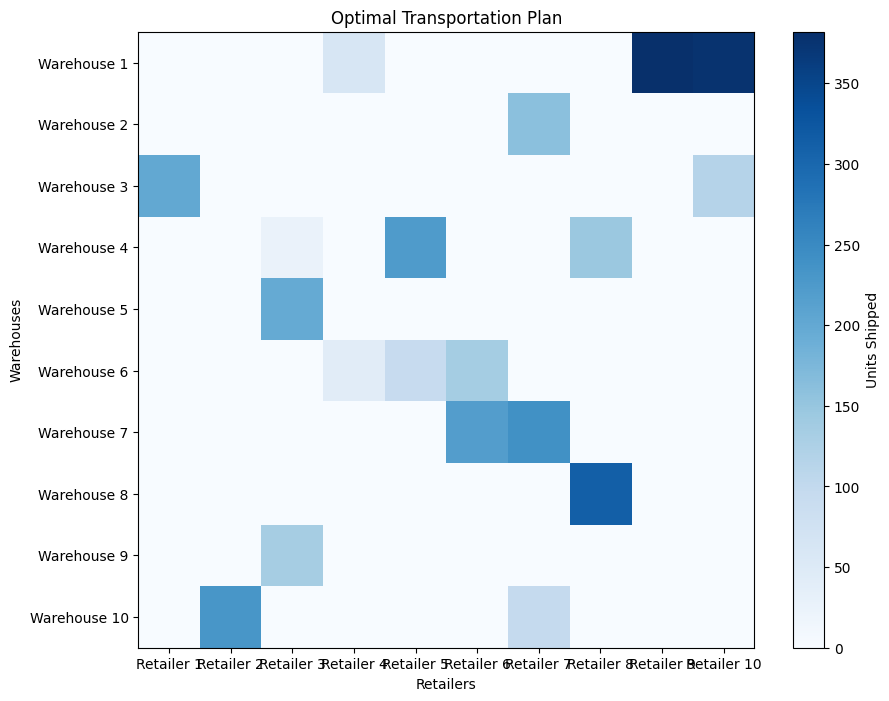


Sensitivity Analysis (with 10% increase in costs):
Total Cost with inflated costs: 58979.8


In [1]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate Random Dataset (warehouses, retailers, transportation costs, supply, demand)
np.random.seed(42)
num_warehouses = 10
num_retailers = 10

# Generate random transportation costs between warehouses and retailers
costs = np.random.randint(10, 50, size=(num_warehouses, num_retailers))

# Generate random supply capacities for warehouses and random demand for retailers
supply = np.random.randint(100, 500, size=num_warehouses)
demand = np.random.randint(100, 500, size=num_retailers)

# Ensure total supply equals total demand for a balanced problem
if supply.sum() > demand.sum():
    demand[0] += supply.sum() - demand.sum()
elif demand.sum() > supply.sum():
    supply[0] += demand.sum() - supply.sum()

# Step 2: Define LP Problem
problem = pulp.LpProblem("Warehouse_Distribution_Optimization", pulp.LpMinimize)

# Create decision variables (x_ij: amount of goods shipped from warehouse i to retailer j)
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_warehouses) for j in range(num_retailers)], lowBound=0)

# Step 3: Objective Function (Minimize Total Transportation Cost)
problem += pulp.lpSum([costs[i][j] * x[(i, j)] for i in range(num_warehouses) for j in range(num_retailers)])

# Step 4: Add Constraints
# Demand constraints (ensure each retailer's demand is met)
for j in range(num_retailers):
    problem += pulp.lpSum([x[(i, j)] for i in range(num_warehouses)]) == demand[j]

# Supply constraints (ensure the amount shipped from each warehouse does not exceed its capacity)
for i in range(num_warehouses):
    problem += pulp.lpSum([x[(i, j)] for j in range(num_retailers)]) <= supply[i]

# Step 5: Solve the LP problem
problem.solve()

# Step 6: Print Results
print(f"Status: {pulp.LpStatus[problem.status]}")
print(f"Total Cost: {pulp.value(problem.objective)}")
solution = pd.DataFrame(0, index=[f"Warehouse {i+1}" for i in range(num_warehouses)],
                        columns=[f"Retailer {j+1}" for j in range(num_retailers)])

for i in range(num_warehouses):
    for j in range(num_retailers):
        solution.iloc[i, j] = pulp.value(x[(i, j)])

print("\nOptimized Distribution Plan (Units Shipped from Warehouses to Retailers):")
print(solution)

# Step 7: Visualization (Heatmap of Transportation Plan)
plt.figure(figsize=(10, 8))
plt.imshow(solution, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Units Shipped')
plt.xticks(np.arange(num_retailers), [f"Retailer {j+1}" for j in range(num_retailers)])
plt.yticks(np.arange(num_warehouses), [f"Warehouse {i+1}" for i in range(num_warehouses)])
plt.title("Optimal Transportation Plan")
plt.xlabel("Retailers")
plt.ylabel("Warehouses")
plt.show()

# Step 8: Sensitivity Analysis (increase costs by 10% and re-solve)
costs_inflated = costs * 1.1
problem_sensitivity = pulp.LpProblem("Sensitivity_Analysis", pulp.LpMinimize)

# New decision variables for sensitivity analysis
x_sensitivity = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_warehouses) for j in range(num_retailers)], lowBound=0)

# Objective function with increased costs
problem_sensitivity += pulp.lpSum([costs_inflated[i][j] * x_sensitivity[(i, j)] for i in range(num_warehouses) for j in range(num_retailers)])

# Demand constraints (same as original)
for j in range(num_retailers):
    problem_sensitivity += pulp.lpSum([x_sensitivity[(i, j)] for i in range(num_warehouses)]) == demand[j]

# Supply constraints (same as original)
for i in range(num_warehouses):
    problem_sensitivity += pulp.lpSum([x_sensitivity[(i, j)] for j in range(num_retailers)]) <= supply[i]

# Solve the sensitivity analysis problem
problem_sensitivity.solve()

print(f"\nSensitivity Analysis (with 10% increase in costs):")
print(f"Total Cost with inflated costs: {pulp.value(problem_sensitivity.objective)}")


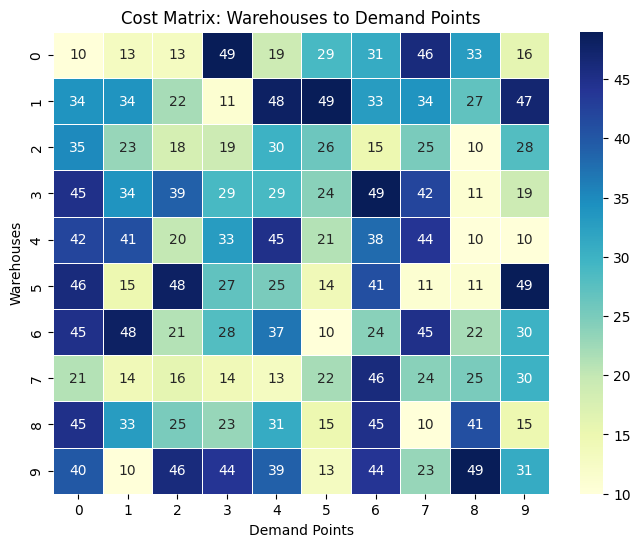

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random costs for 10 warehouses and 10 demand points
np.random.seed(0)
costs = np.random.randint(10, 50, size=(10, 10))

# Create a heatmap to visualize the cost matrix
plt.figure(figsize=(8, 6))
sns.heatmap(costs, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

# Adding labels and titles
plt.title("Cost Matrix: Warehouses to Demand Points")
plt.xlabel("Demand Points")
plt.ylabel("Warehouses")

# Show the plot
plt.show()
